<a href="https://colab.research.google.com/github/seymaerdogan0/machine-learning-starter-project/blob/main/dengesiz_kart_verileri_%C3%BCzerine_en_verimli_makine_%C3%B6%C4%9Frenmesi_algoritmas%C4%B1n%C4%B1_bulma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Eƒüer /root/.kaggle klas√∂r√º yoksa olu≈ütur
os.makedirs("/root/.kaggle", exist_ok=True)


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eymaerdoan","key":"3569e5853849ea68cb554be218e05f7a"}'}

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

with zipfile.ZipFile("creditcardfraud.zip", "r") as zip_ref:
    zip_ref.extractall("creditcardfraud")

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:

df = pd.read_csv("creditcardfraud/creditcard.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

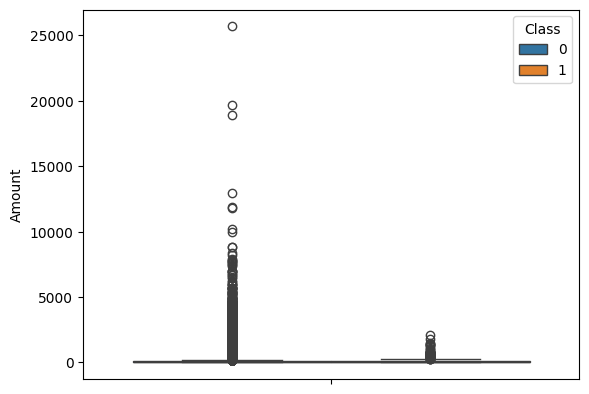

In [ ]:
sns.boxplot(y="Amount",hue="Class",data=df)
plt.show()

Amount deƒüi≈ükeninde √ßok fazla outlier var . dolandƒ±rƒ±cƒ±lƒ±k sƒ±nƒ±fƒ±nda √ßok y√ºksek outlier deƒüerleri olmadƒ±ƒüƒ± i√ßin √ßok fazla veri kaybƒ± olmamasƒ± a√ßƒ±sƒ±ndan dolandƒ±rƒ±cƒ±lƒ±k classƒ±nda olmayan kadar outlierƒ± silebiliriz

In [ ]:
# Amount deƒüeri dolandƒ±rƒ±cƒ±lƒ±k verisinin √ºst√ºnde olan veriler siliniyor
df = df.drop(df[df["Amount"] > 3000].index, axis=0).reset_index(drop=True)

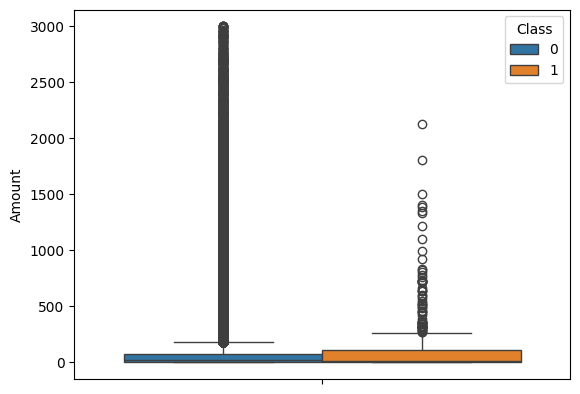

In [ ]:
sns.boxplot(y="Amount",hue="Class",data=df)
plt.show()

hala normal verilerde outlier daha fazla. biraz daha silelim

In [ ]:
df = df.drop(df[df["Amount"] > 750].index, axis=0).reset_index(drop=True)

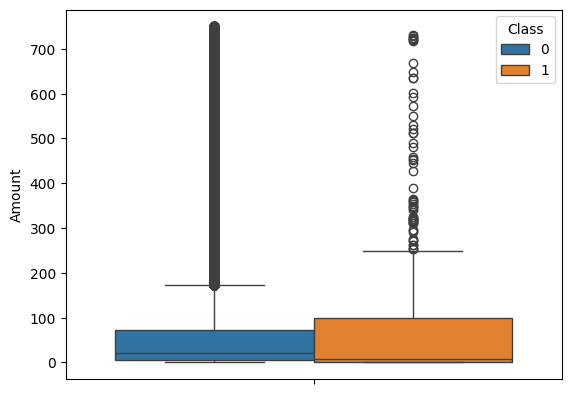

In [ ]:
sns.boxplot(y="Amount",hue="Class",data=df)
plt.show()

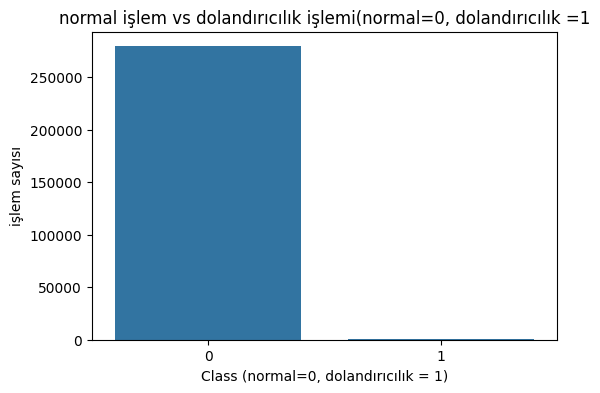

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title("normal i≈ülem vs dolandƒ±rƒ±cƒ±lƒ±k i≈ülemi(normal=0, dolandƒ±rƒ±cƒ±lƒ±k =1")
plt.xlabel('Class (normal=0, dolandƒ±rƒ±cƒ±lƒ±k = 1)')
plt.ylabel('i≈ülem sayƒ±sƒ±')
plt.show()

dolandƒ±rƒ±cƒ±lƒ±k verileri normal verilerden a≈üƒ±r az. bu dengesizliƒüi eƒüitimden √∂nce √ß√∂zeceƒüiz

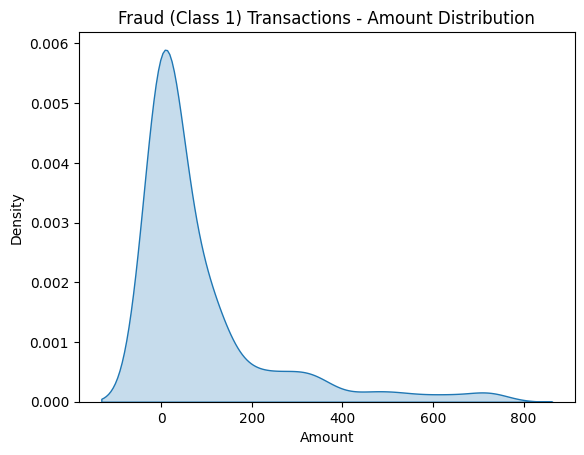

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class deƒüeri 1 olan (fraud) i≈ülemleri filtreleme
df_fraud = df[df["Class"] == 1]

# Amount deƒüi≈ükeninin KDE daƒüƒ±lƒ±m grafiƒüi
sns.kdeplot(data=df_fraud, x="Amount", fill=True)
plt.title("Fraud (Class 1) Transactions - Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.show()


belli tutarlarda dolandƒ±rƒ±cƒ±lƒ±k i≈ülemi sayƒ±sƒ± fazla

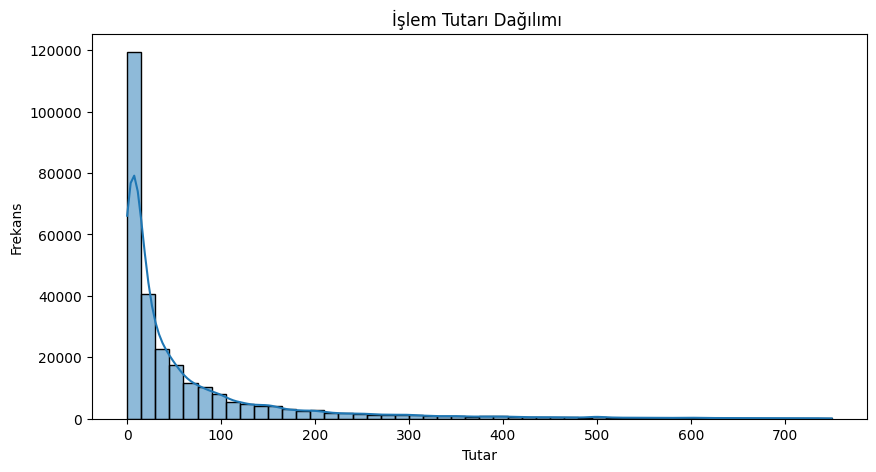

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("ƒ∞≈ülem Tutarƒ± Daƒüƒ±lƒ±mƒ± ")
plt.xlabel("Tutar")
plt.ylabel("Frekans")
plt.show()


ama genel olarak o tutarlarda i≈ülem daha fazla

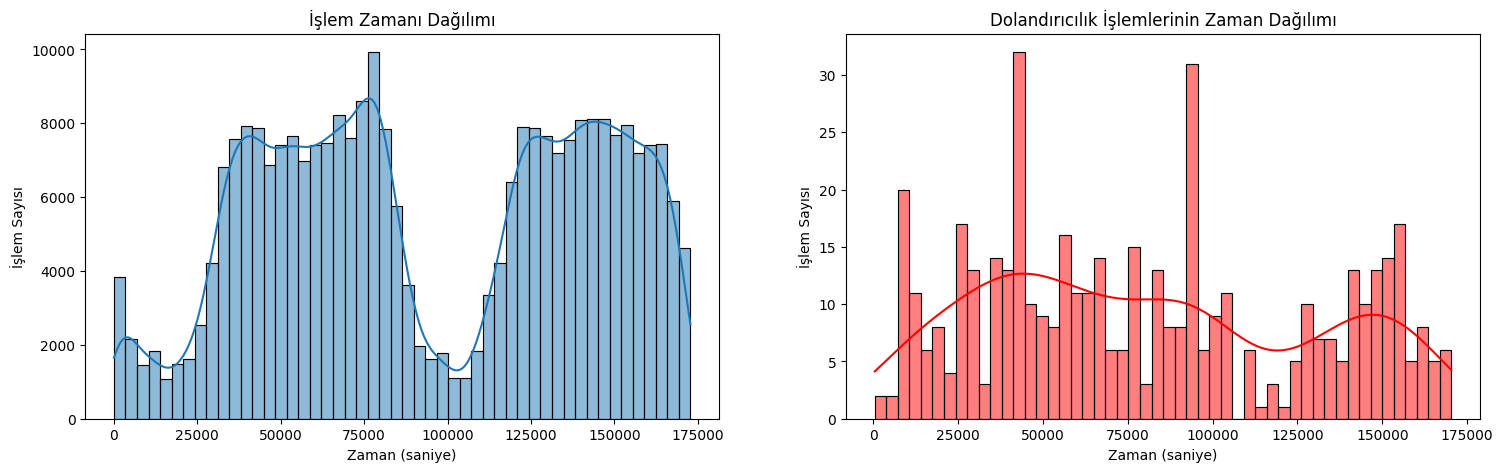

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18,5))

sns.histplot(df['Time'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("ƒ∞≈ülem Zamanƒ± Daƒüƒ±lƒ±mƒ±")
axes[0].set_xlabel("Zaman (saniye)")
axes[0].set_ylabel("ƒ∞≈ülem Sayƒ±sƒ±")

sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color='red', ax=axes[1])
axes[1].set_title("Dolandƒ±rƒ±cƒ±lƒ±k ƒ∞≈ülemlerinin Zaman Daƒüƒ±lƒ±mƒ±")
axes[1].set_xlabel("Zaman (saniye)")
axes[1].set_ylabel("ƒ∞≈ülem Sayƒ±sƒ±")

plt.show()

<Axes: >

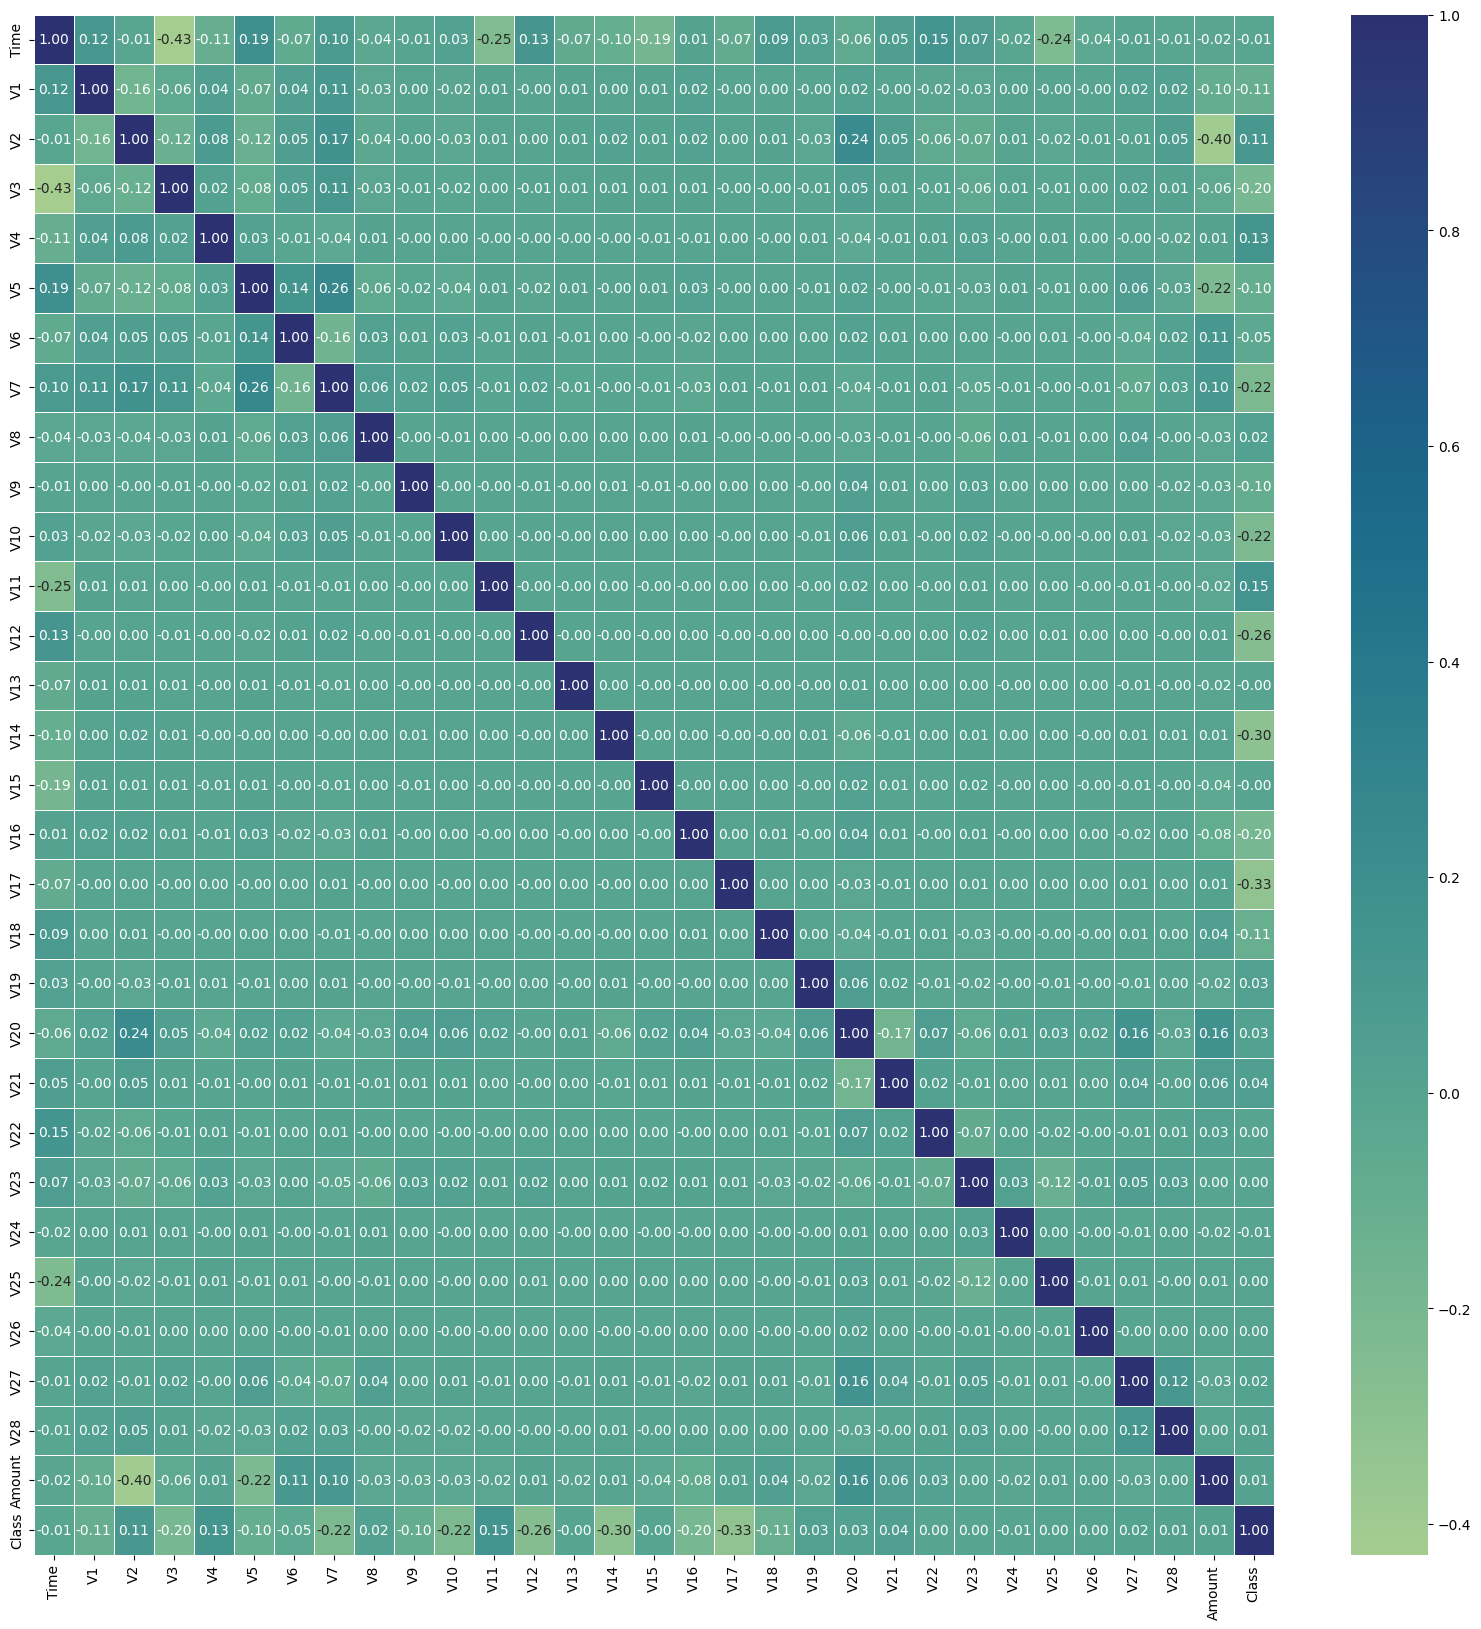

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),fmt=".2f",annot=True,linewidths=0.5,cmap="crest")

≈üimdi bu ≈üekilde ili≈ükiler ve hangi √∂zelliklerin daha √∂nemli olduƒüu √ßok anla≈üƒ±lmƒ±yor. bunun i√ßin verimizin √∂zellik √∂nemlerini inceleyelim ve verimizi test ve train olarak b√∂lelim ki model eƒüitiminde d√ºzg√ºnce kullanabilelim.

Veri setindeki Amount ve Time gibi deƒüi≈ükenlerin √∂l√ßekleri farklƒ± olduƒüu i√ßin, StandardScaler ile t√ºm deƒüi≈ükenler aynƒ± √∂l√ßeƒüe getirmeliyiz. class 1 ve class 0 arasƒ±ndaki dengesizliƒüi √ß√∂zmek i√ßin de undersampling metodunu kullanabiliriz(aslƒ±nda SMOTE , oversampling, class weight gibi metodlar da var fakat verimiz √ßok fazla olduƒüu i√ßin sentetik veri √ºretince √ßok gpu t√ºketiyor, i≈ülem s√ºresi uzuyor, ben colabin √ºcretsiz gpu hakkƒ±nƒ± kullanƒ±yorum o da hƒ±zlƒ± t√ºkeniyor. bu nedenle undersampling metodunu tercih ettim.)  Bu ≈üekilde, modelin sadece √ßoƒüunluk sƒ±nƒ±fƒ±na y√∂nelmesini engelleyerek daha adil tahminler yapmasƒ±nƒ± saƒülƒ±yoruz.



    Verimizi test ve train olarak √∂zellik √∂nem analizi grafiƒüini √ßizerken b√∂lm√º≈üt√ºk
    cross validation i√ßin ise farklƒ± bir metod kullanacaƒüƒ±m bu nedenle onun i√ßin ayrƒ± bir veri b√∂lmedim

In [ ]:
df['Class'].value_counts()

Class
0    279356
1       476
Name: count, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

d_c0 = df[df["Class"] == 0]

d_c1 = df[df["Class"] == 1]

d_c0 = d_c0.sample(n=476, random_state=42)

df_sampled = pd.concat([d_c0, d_c1], axis=0)

def normalize_features(df_sampled, features):
    df_normalized = df_sampled.copy()
    for var in features:
        mean_val = np.mean(df_sampled[var])
        max_val = np.max(df_sampled[var])
        min_val = np.min(df_sampled[var])
        df_normalized[var] = (df_sampled[var] - mean_val) / (max_val - min_val)

    return df_normalized

# Normalize edilecek √∂zellikleri belirle (Class hari√ß)
features = df_sampled.columns.tolist()
features.remove("Class")

# Normalizasyon i≈ülemi
df_normalized = normalize_features(df_sampled, features)

# Class s√ºtununu geri ekleyelim
df_normalized["Class"] = df_sampled["Class"]

X = df_normalized.drop(['Class'], axis=1)
Y = df_normalized['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)

X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train size: {len(X_train)}, Validation size: {len(X_cv)}, Test size: {len(X_test)}")
print("\nSƒ±nƒ±f Daƒüƒ±lƒ±mƒ±:")
print("Eƒüitim Seti:")
print(pd.Series(y_train).value_counts())
print("\nDoƒürulama Seti:")
print(pd.Series(y_cv).value_counts())
print("\nTest Seti:")
print(pd.Series(y_test).value_counts())


Train size: 571, Validation size: 190, Test size: 191

Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±:
Eƒüitim Seti:
Class
1    286
0    285
Name: count, dtype: int64

Doƒürulama Seti:
Class
1    95
0    95
Name: count, dtype: int64

Test Seti:
Class
0    96
1    95
Name: count, dtype: int64


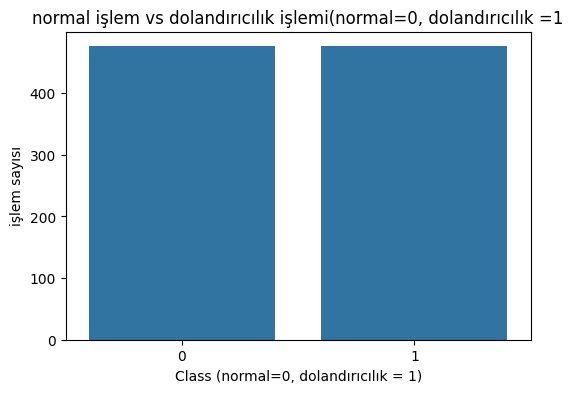

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=dataN)
plt.title("normal i≈ülem vs dolandƒ±rƒ±cƒ±lƒ±k i≈ülemi(normal=0, dolandƒ±rƒ±cƒ±lƒ±k =1")
plt.xlabel('Class (normal=0, dolandƒ±rƒ±cƒ±lƒ±k = 1)')
plt.ylabel('i≈ülem sayƒ±sƒ±')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models_undersample = {
    "RF_UnderSampling": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced'
    ),
    "RF_MoreTrees_UnderSampling": RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42,
        class_weight='balanced'
    ),
    "XGBoost_UnderSampling": XGBClassifier(
        n_estimators=100,
        max_depth=6,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        scale_pos_weight=len(y_train) / sum(y_train)
    )
}

results = {}

for model_name, model in models_undersample.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_cv)

    accuracy = accuracy_score(y_cv, y_pred)
    precision = precision_score(y_cv, y_pred)
    recall = recall_score(y_cv, y_pred)
    f1 = f1_score(y_cv, y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# **Sonu√ßlarƒ± Yazdƒ±r**
print("\n=== Model Performans Sonu√ßlarƒ± ===")
for model, metrics in results.items():
    print(f"\nüìå {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



=== Model Performans Sonu√ßlarƒ± ===

üìå RF_UnderSampling
Accuracy: 0.9526
Precision: 0.9778
Recall: 0.9263
F1 Score: 0.9514

üìå RF_MoreTrees_UnderSampling
Accuracy: 0.9526
Precision: 0.9778
Recall: 0.9263
F1 Score: 0.9514

üìå XGBoost_UnderSampling
Accuracy: 0.9526
Precision: 0.9574
Recall: 0.9474
F1 Score: 0.9524


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:09:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

nn_model_use = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model_use.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = nn_model_use.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_cv, y_cv),
    callbacks=[early_stopping],
    verbose=1
)

y_pred_prob = nn_model_use.predict(X_cv)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_cv, y_pred)
precision = precision_score(y_cv, y_pred)
recall = recall_score(y_cv, y_pred)
f1 = f1_score(y_cv, y_pred)

print("\n Yapay Sinir Aƒüƒ± Modeli Performansƒ±")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 21ms/step - accuracy: 0.6558 - loss: 0.6641 - val_accuracy: 0.8632 - val_loss: 0.5927
Epoch 2/20
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.8457 - loss: 0.5719 - val_accuracy: 0.8947 - val_loss: 0.4888
Epoch 3/20
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.8852 - loss: 0.4535 - val_accuracy: 0.9053 - val_loss: 0.3858
Epoch 4/20
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.8809 - loss: 0.3735 - val_accuracy: 0.9105 - val_loss: 0.3072
Epoch 5/20
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - accuracy: 0.9149 - loss: 0.2827 - val_accuracy: 0.9105 - val_loss: 0.2539
Epoch 6/20
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - accuracy: 0.9242 - loss: 0.2345 - val_accuracy: 0.9158 - val_loss: 0.2178
Epoch 7/20
18/

6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step

 Yapay Sinir Aƒüƒ± Modeli Performansƒ±
Accuracy: 0.9579
Precision: 0.9677
Recall: 0.9474
F1 Score: 0.9574


### farklƒ± n√∂ron sayƒ±larƒ±yla Deneme

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import Dropout, BatchNormalization

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Verileri normalle≈ütirir
    Dropout(0.3),  # Overfitting'i azaltƒ±r
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


nn_model_use.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history2 = nn_model_use.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_cv, y_cv),
    callbacks=[early_stopping],
    verbose=1
)

y_pred_prob = nn_model_use.predict(X_cv)
y_pred2 = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_cv, y_pred2)
precision = precision_score(y_cv, y_pred2)
recall = recall_score(y_cv, y_pred2)
f1 = f1_score(y_cv, y_pred2)

print("\n Yapay Sinir Aƒüƒ± Modeli Performansƒ±")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 53ms/step - accuracy: 0.9590 - loss: 0.1009 - val_accuracy: 0.9579 - val_loss: 0.1370
Epoch 2/25
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - accuracy: 0.9670 - loss: 0.0852 - val_accuracy: 0.9632 - val_loss: 0.1369
Epoch 3/25
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.9576 - loss: 0.0913 - val_accuracy: 0.9632 - val_loss: 0.1374
Epoch 4/25
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.9626 - loss: 0.0898 - val_accuracy: 0.9632 - val_loss: 0.1406
Epoch 5/25
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.9602 - loss: 0.0907 - val_accuracy: 0.9632 - val_loss: 0.1407
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step

 Yapay Sinir Aƒüƒ± Modeli Performansƒ±
Accuracy: 0.9632
Precision: 0.9783
Recall: 0.9474
F1 Score: 0.

√ßok az bir fark oldu

## **daha k√º√ß√ºk batchsize ile deneme (verimiz √ßok b√ºy√ºk deƒüil tek seferde daha az √∂rnek daha iyi √∂ƒürenmesini saƒülayabilir)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

nn_model_use = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model_use.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history3 = nn_model_use.fit(
    X_train, y_train,
    epochs=25,
    batch_size=8,
    validation_data=(X_cv, y_cv),
    callbacks=[early_stopping],
    verbose=1
)

y_pred_prob = nn_model_use.predict(X_cv)
y_pred3 = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_cv, y_pred3)
precision = precision_score(y_cv, y_pred3)
recall = recall_score(y_cv, y_pred3)
f1 = f1_score(y_cv, y_pred3)

print("\n Yapay Sinir Aƒüƒ± Modeli Performansƒ±")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.7683 - loss: 0.6284 - val_accuracy: 0.9053 - val_loss: 0.3856
Epoch 2/25
72/72 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - accuracy: 0.8928 - loss: 0.3281 - val_accuracy: 0.9263 - val_loss: 0.2074
Epoch 3/25
72/72 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9455 - loss: 0.1861 - val_accuracy: 0.9526 - val_loss: 0.1608
Epoch 4/25
72/72 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.9577 - loss: 0.1260 - val_accuracy: 0.9579 - val_loss: 0.1485
Epoch 5/25
72/72 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9507 - loss: 0.1417 - val_accuracy: 0.9474 - val_loss: 0.1451
Epoch 6/25
72/72 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9404 - loss: 0.1469 - val_accuracy: 0.9579 - val_loss: 0.1403
Epoch 7/25
72/

bir tƒ±k daha iyi

In [ ]:
!pip install catboost


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


xg boosta benzeyen bir model deneyelim

In [ ]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.05,
    random_state=42,
    scale_pos_weight=len(y_train) / sum(y_train),
    verbose=0
)

catboost_model.fit(X_train, y_train)

y_pred_catboost = catboost_model.predict(X_val)

print("\nüìä CatBoost Modeli Performans Raporu:")
print(classification_report(y_val, y_pred_catboost))
print("F1-Score:", f1_score(y_val, y_pred_catboost))



üìä CatBoost Modeli Performans Raporu:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        95
           1       0.97      0.94      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

F1-Score: 0.9518716577540107


bu model de k√º√ß√ºk verilerle daha iyi √ßalƒ±≈üƒ±yormu≈ü

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_val)

print("\nüìä SVM Modeli Performans Raporu:")
print(classification_report(y_val, y_pred_svm))
print("F1-Score:", f1_score(y_val, y_pred_svm))



üìä SVM Modeli Performans Raporu:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        95
           1       0.99      0.91      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

F1-Score: 0.945054945054945


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(
    class_weight='balanced',
    max_iter=500,
    random_state=42
)

log_reg_model.fit(X_train, y_train)

y_pred_logreg = log_reg_model.predict(X_val)

print("\nüìä Logistic Regression Modeli Performans Raporu:")
print(classification_report(y_val, y_pred_logreg))
print("F1-Score:", f1_score(y_val, y_pred_logreg))



üìä Logistic Regression Modeli Performans Raporu:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        95
           1       1.00      0.87      0.93        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

F1-Score: 0.9325842696629213


**bu √ßok temel bir model √ßok iyi sonu√ß vermesini beklemiyordum zaten**

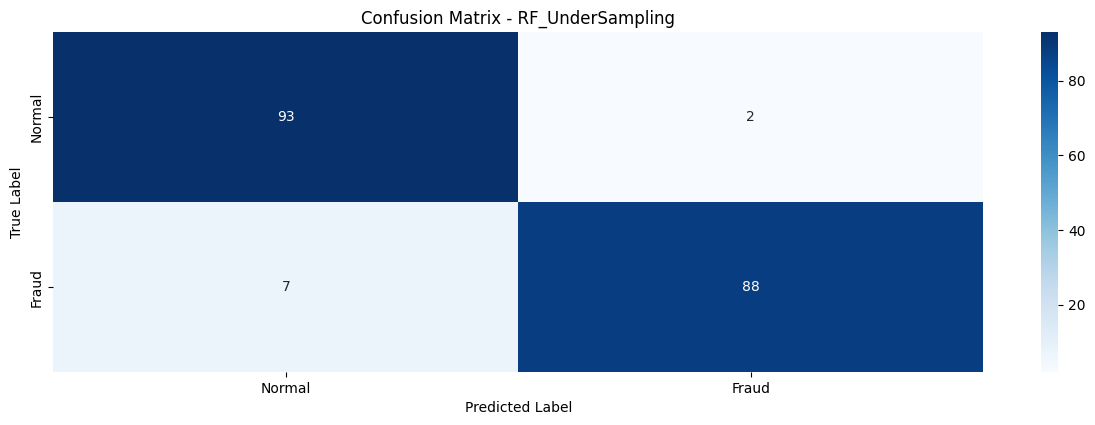

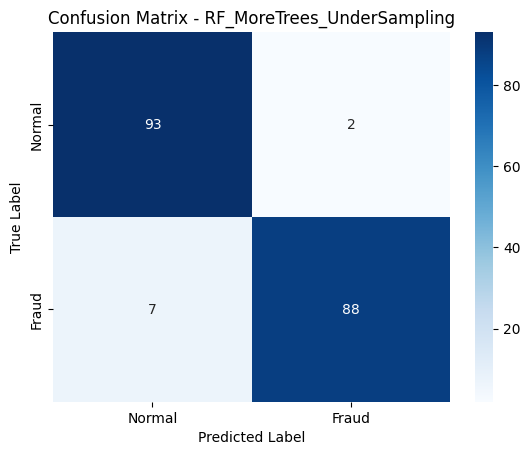

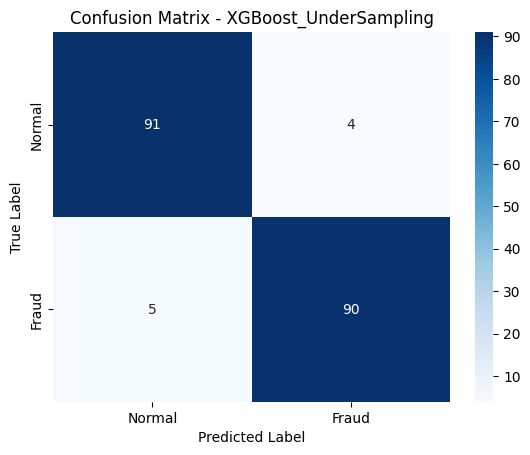

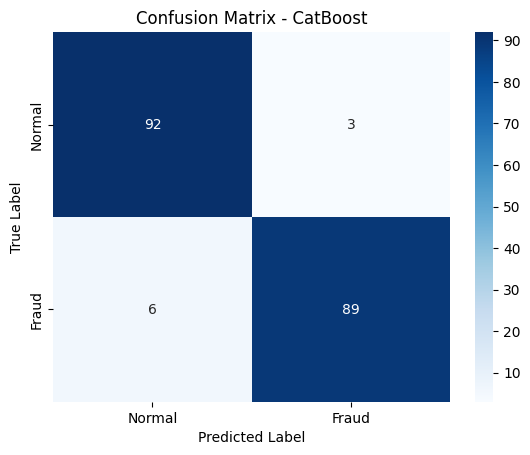

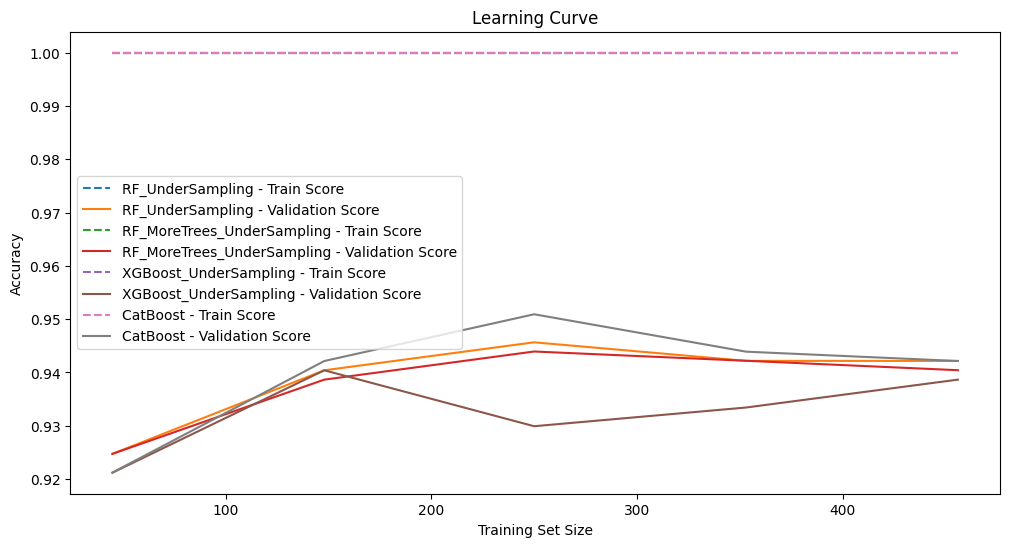

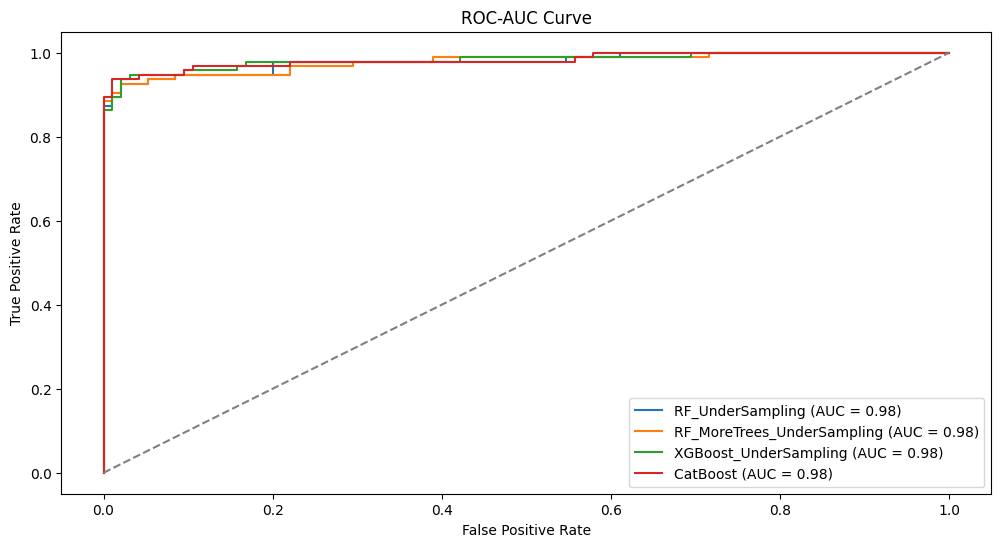

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve


models = {
    "RF_UnderSampling": models_undersample["RF_UnderSampling"],
    "RF_MoreTrees_UnderSampling": models_undersample["RF_MoreTrees_UnderSampling"],
    "XGBoost_UnderSampling": models_undersample["XGBoost_UnderSampling"],
    "CatBoost": catboost_model
}

X_test_set = X_val
y_test_set = y_val

plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.title("Confusion Matrix")
for name, model in models.items():
    y_pred = model.predict(X_test_set)
    cm = confusion_matrix(y_test_set, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

plt.figure(figsize=(12, 6))
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label=f"{name} - Train Score", linestyle="--")
    plt.plot(train_sizes, test_mean, label=f"{name} - Validation Score")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test_set)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_set)
    fpr, tpr, _ = roc_curve(y_test_set, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()


# CONFUSƒ∞ON MATRƒ∞X

**RandomForest modelleri genel olarak iyi performans g√∂steriyor ancak 7 fraud vakasƒ±nƒ± ka√ßƒ±rƒ±yor.
Daha fazla derinlik veya daha fazla aƒüa√ß kullanmak, modelin performansƒ±nƒ± √ßok fazla deƒüi≈ütirmemi≈ü.**

**XGBoost modeli, fraud tespitinde daha ba≈üarƒ±lƒ± g√∂r√ºn√ºyor (90 doƒüru tahmin).
CatBoost modeli, yanlƒ±≈ü alarmlarƒ± (False Positive) en aza indirerek dengeli bir performans sunuyor.
Eƒüer odak fraud vakalarƒ±nƒ± yakalamaksa, XGBoost daha iyi bir se√ßim olabilir.
Eƒüer yanlƒ±≈ü alarmlar √∂nemliyse (√∂rneƒüin m√º≈üteri memnuniyeti a√ßƒ±sƒ±ndan), CatBoost tercih edilebilir.**



# LEARNƒ∞NG CURVE
## Analiz:

**CatBoost modeli a≈üƒ±rƒ± y√ºksek bir eƒüitim doƒüruluƒüuna sahip, validation doƒüruluƒüu ise d√º≈ü√ºk.
‚Üí Bu, a≈üƒ±rƒ± √∂ƒürenme (overfitting) belirtisi olabilir.
Diƒüer modeller (RF, XGBoost) daha istikrarlƒ± bir ≈üekilde √∂ƒüreniyor.
‚Üí Eƒüitim seti arttƒ±k√ßa doƒüruluk artƒ±yor, ancak a≈üƒ±rƒ± bir fark yok.
Validation doƒüruluƒüu bir noktadan sonra d√º≈ümeye ba≈ülƒ±yor.
‚Üí Bu, modelin a≈üƒ±rƒ± √∂ƒürenmeye ba≈üladƒ±ƒüƒ±nƒ± ve daha fazla veriye ihtiyacƒ± olabileceƒüini g√∂sterir.**

## √áƒ±karƒ±m:

**CatBoost modeli fazla ezberliyor (overfitting).
Diƒüer modeller dengeli √∂ƒüreniyor ancak validation doƒüruluklarƒ± sabitleniyor.
Eƒüer daha fazla veri eklenirse veya regularization artƒ±rƒ±lƒ±rsa, CatBoost'un overfitting'i azaltƒ±labilir.**

# ROC-AUC CURVE

## Analiz
**ROC eƒürileri birbirine √ßok benziyor.
‚Üí Demek ki bu modellerin sahtecilik tespiti yetenekleri birbirine olduk√ßa yakƒ±n.
Eƒürilerin √ßoƒüu 0.0 - 0.2 False Positive b√∂lgesinde dik bir √ßƒ±kƒ±≈ü yapƒ±yor.
‚Üí Bu, modellerin d√º≈ü√ºk yanlƒ±≈ü alarm oranƒ± (False Positive) ile y√ºksek tespit oranƒ± (True Positive) saƒüladƒ±ƒüƒ±nƒ± g√∂sterir.**

## √áƒ±karƒ±m

**T√ºm modeller sahtecilik tespitinde ba≈üarƒ±lƒ± g√∂r√ºn√ºyor.
AUC deƒüerleri arasƒ±nda fark olmadƒ±ƒüƒ± i√ßin modellerin diƒüer metrikleri (Recall, Precision) kƒ±yaslanarak en iyi model se√ßilebilir.
Eƒüer ROC eƒürisinde bir model daha d√º≈ü√ºk kalsaydƒ±, onun daha zayƒ±f olduƒüunu s√∂yleyebilirdik.**

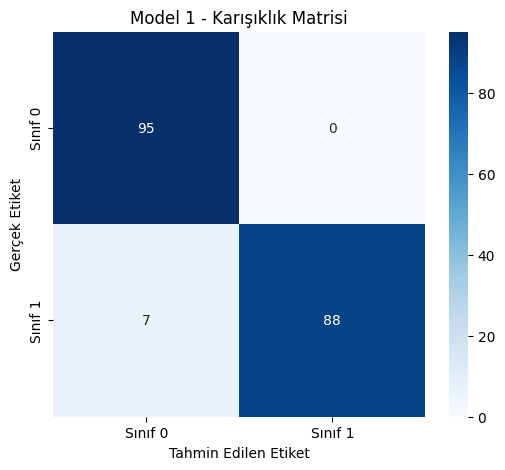

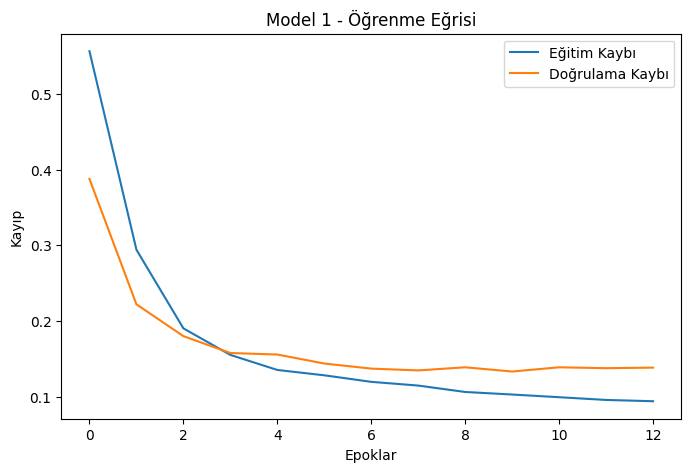

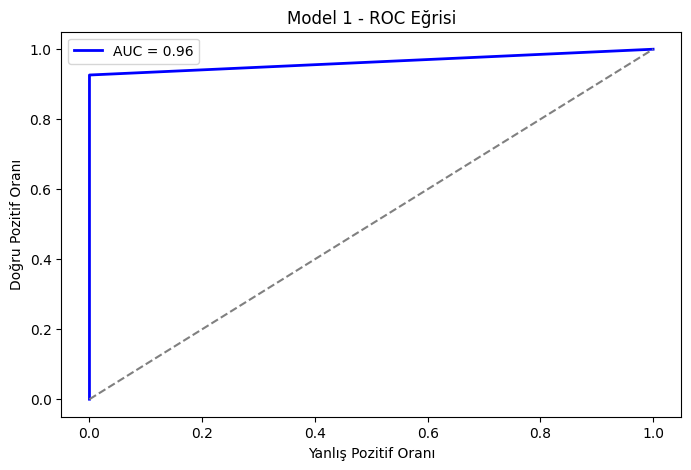

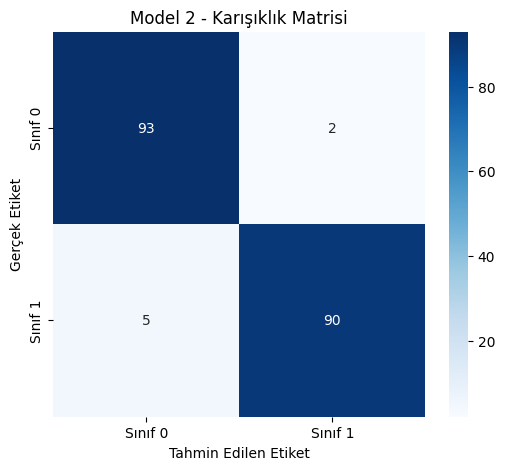

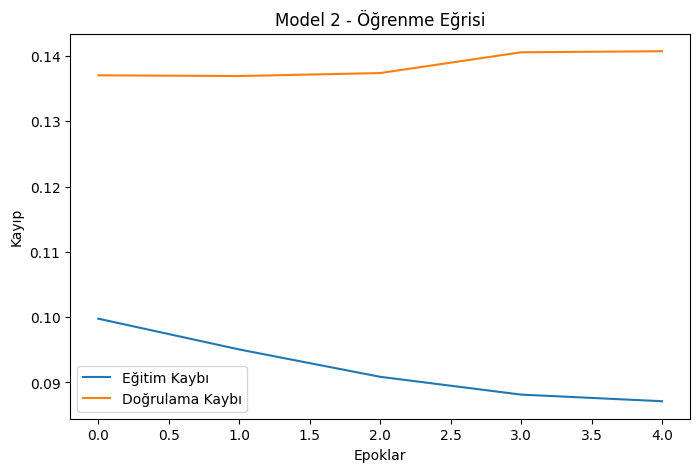

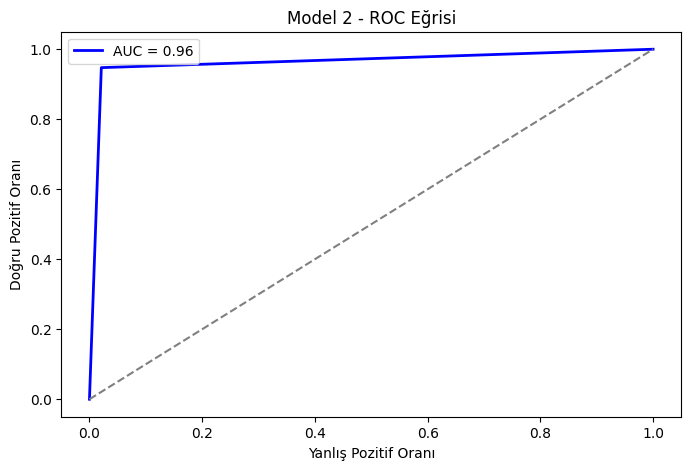

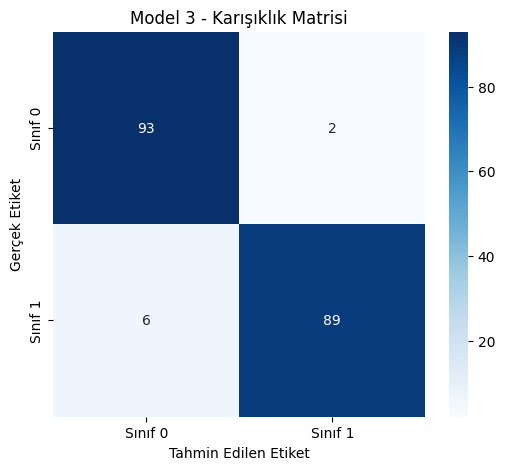

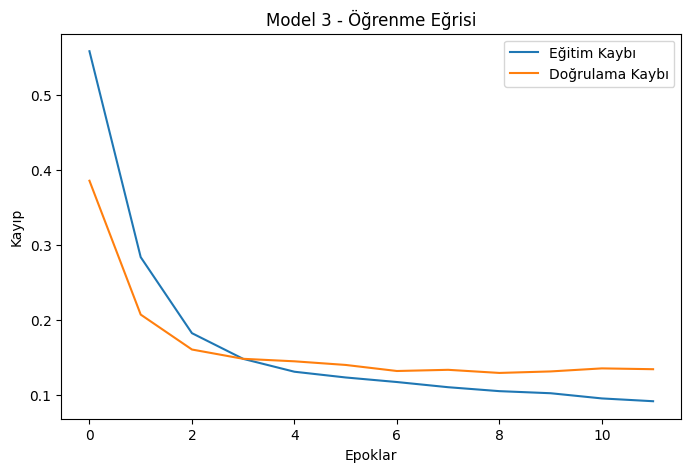

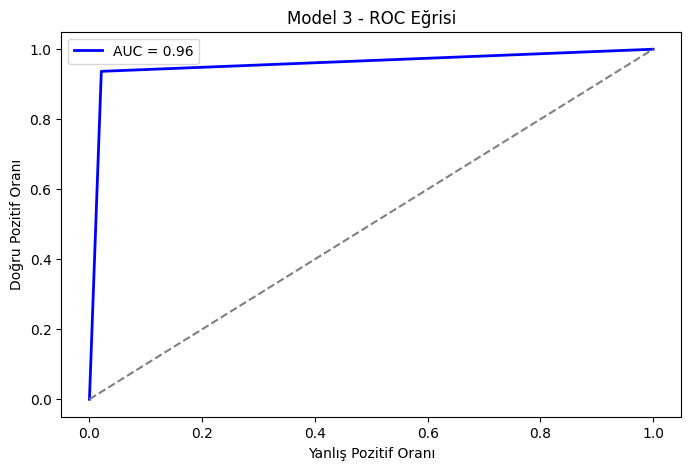

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Karƒ±≈üƒ±klƒ±k Matrisi √áizme Fonksiyonu
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sƒ±nƒ±f 0", "Sƒ±nƒ±f 1"], yticklabels=["Sƒ±nƒ±f 0", "Sƒ±nƒ±f 1"])
    plt.xlabel("Tahmin Edilen Etiket")
    plt.ylabel("Ger√ßek Etiket")
    plt.title(title)
    plt.show()

# √ñƒürenme Eƒürisi √áizme Fonksiyonu
def plot_learning_curve(history, title):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Eƒüitim Kaybƒ±')
    plt.plot(history.history['val_loss'], label='Doƒürulama Kaybƒ±')
    plt.xlabel("Epoklar")
    plt.ylabel("Kayƒ±p")
    plt.title(title)
    plt.legend()
    plt.show()

# ROC Eƒürisi √áizme Fonksiyonu
def plot_roc_curve(y_true, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel("Yanlƒ±≈ü Pozitif Oranƒ±")
    plt.ylabel("Doƒüru Pozitif Oranƒ±")
    plt.title(title)
    plt.legend()
    plt.show()

# üìå **Model 1: Basit Model (64-32-1)**
plot_confusion_matrix(y_cv, y_pred, title="Model 1 - Karƒ±≈üƒ±klƒ±k Matrisi")
plot_learning_curve(history, title="Model 1 - √ñƒürenme Eƒürisi")
plot_roc_curve(y_cv, y_pred, title="Model 1 - ROC Eƒürisi")

# üìå **Model 2: Geli≈ümi≈ü Model (128-64-32-1, BatchNorm + Dropout)**
plot_confusion_matrix(y_cv, y_pred2, title="Model 2 - Karƒ±≈üƒ±klƒ±k Matrisi")
plot_learning_curve(history2, title="Model 2 - √ñƒürenme Eƒürisi")
plot_roc_curve(y_cv, y_pred2, title="Model 2 - ROC Eƒürisi")

# üìå **Model 3: Alternatif Model (64-32-1, farklƒ± batch_size ve epoch)**
plot_confusion_matrix(y_cv, y_pred3, title="Model 3 - Karƒ±≈üƒ±klƒ±k Matrisi")
plot_learning_curve(history3, title="Model 3 - √ñƒürenme Eƒürisi")
plot_roc_curve(y_cv, y_pred3, title="Model 3 - ROC Eƒürisi")


### Model 1,
**sƒ±nƒ±f 0'ƒ± √ßok iyi tahmin ediyor (0 yanlƒ±≈ü pozitif var!) ve sƒ±nƒ±f 1 i√ßin 7 hata yapmƒ±≈ü (yanlƒ±≈ü negatifler). Yani model, fraud olan bazƒ± i≈ülemleri ka√ßƒ±rabiliyor ama genel olarak olduk√ßa iyi bir performans sergiliyor.**

**√ñƒürenme Eƒürisi (Learning Curve)**

Eƒüitim kaybƒ± (mavi √ßizgi) hƒ±zla d√º≈ü√ºyor, doƒürulama kaybƒ± (turuncu √ßizgi) da benzer bir eƒüilim g√∂steriyor.
 8. epok'tan sonra doƒürulama kaybƒ± d√º≈ümemeye ba≈ülƒ±yor ve dalgalanmalar var.
Overfitting belirtisi yok, eƒüitim ve doƒürulama kayƒ±plarƒ± birbirine yakƒ±n seyrediyor.

Model √ßok iyi √∂ƒürenmi≈ü, overfitting yapmamƒ±≈ü, ancak doƒürulama kaybƒ± belli bir noktadan sonra iyile≈ümeyi bƒ±rakmƒ±≈ü. Daha fazla iyile≈ütirme i√ßin Dropout eklemek veya batch size artƒ±rmak d√º≈ü√ºn√ºlebilir.*

**ROC eƒürisi**
 AUC = 0.96 olduƒüu i√ßin, Model 1 olduk√ßa ba≈üarƒ±lƒ± bir sƒ±nƒ±flandƒ±rƒ±cƒ±dƒ±r.
 Yanlƒ±≈ü pozitif oranƒ± d√º≈ü√ºk, yani fraud olmayan i≈ülemleri yanlƒ±≈ü tahmin etme olasƒ±lƒ±ƒüƒ± az.
Yanlƒ±≈ü negatifler biraz var, yani bazƒ± fraud i≈ülemleri ka√ßabiliyor.

### Model 2,

Model 1 ile kƒ±yasladƒ±ƒüƒ±mƒ±zda:
Model 2, yanlƒ±≈ü pozitifleri biraz artƒ±rmƒ±≈ü (2 yanlƒ±≈ü pozitif)
Yanlƒ±≈ü negatifleri biraz azaltmƒ±≈ü (5 hata yerine 7 idi Model 1‚Äôde)
Daha dengeli tahmin yapƒ±yor gibi g√∂r√ºn√ºyor.

√ñƒürenme Eƒürisi (Loss Curve)
Eƒüitim kaybƒ± d√º≈üerken, doƒürulama kaybƒ± sabit kalƒ±yor veya artƒ±yor.
Bu, modelin biraz overfitting yaptƒ±ƒüƒ±nƒ± g√∂sterebilir.

Yanlƒ±≈ü pozitif oranƒ± (X ekseni) d√º≈ü√ºk, yani model fraud olmayan i≈ülemleri doƒüru ayƒ±rabiliyor.
Yanlƒ±≈ü negatif oranƒ± Model 1‚Äôe g√∂re biraz daha azalmƒ±≈ü.
Genel olarak Model 1 ile neredeyse aynƒ± performansa sahip, ancak biraz daha fazla overfitting yapmƒ±≈ü.

### Model 3,

Model 3, sƒ±nƒ±f 0‚Äôƒ± (normal i≈ülemleri) tahmin etmekte ba≈üarƒ±lƒ±, yalnƒ±zca 2 yanlƒ±≈ü pozitif var.
Sƒ±nƒ±f 1 (Fraud) i√ßin 6 yanlƒ±≈ü negatif yapmƒ±≈ü.
Model 2 ile kar≈üƒ±la≈ütƒ±rƒ±ldƒ±ƒüƒ±nda:
Yanlƒ±≈ü pozitifler Model 2 ile aynƒ± (2 hata).
Yanlƒ±≈ü negatifler Model 2'den biraz daha fazla (5 yerine 6 hata).
Model 3, Model 2‚Äôye g√∂re biraz daha fazla fraud i≈ülemi ka√ßƒ±rƒ±yor.

√ñƒürenme Eƒürisi (Loss Curve)
Model hƒ±zlƒ± √∂ƒürenmi≈ü ve erken durdurma (early stopping) iyi √ßalƒ±≈ümƒ±≈ü.
Overfitting g√∂zlenmiyor, √ß√ºnk√º eƒüitim kaybƒ± ile doƒürulama kaybƒ± arasƒ±ndaki fark √ßok b√ºy√ºk deƒüil.
Genel olarak stabil bir model.

 ROC Eƒürisi
 Yanlƒ±≈ü pozitif oranƒ± (X ekseni) d√º≈ü√ºk, yani model fraud olmayan i≈ülemleri doƒüru ayƒ±rabiliyor.
Yanlƒ±≈ü negatif oranƒ± Model 2‚Äôden biraz daha y√ºksek.
Genel olarak Model 1 ve Model 2 ile aynƒ± doƒürulukta ama fraud i≈ülemleri ka√ßƒ±rma oranƒ± biraz daha y√ºksek olabilir.

# GENEL DEƒûERLENDƒ∞RME

‚úî Model 1, yanlƒ±≈ü pozitifleri sƒ±fƒ±r yaparak en iyi normal i≈ülem tahminini yapƒ±yor.
‚úî Model 2, en az yanlƒ±≈ü negatif yapƒ±yor (daha az fraud ka√ßƒ±rƒ±yor), ancak biraz overfitting yapƒ±yor.
‚úî Model 3, stabil √ßalƒ±≈üƒ±yor ama fraud i≈ülemleri Model 2‚Äôden biraz daha fazla ka√ßƒ±rƒ±yor.
‚úî AUC deƒüerleri aynƒ± olduƒüu i√ßin genel ba≈üarƒ±larƒ± e≈üit.

Son Karar:

Fraud i≈ülemleri ka√ßƒ±rmamak daha √∂nemliyse Model 2 en iyisi.
Yanlƒ±≈ü alarm vermemek (yanlƒ±≈ü pozitifleri sƒ±fƒ±ra d√º≈ü√ºrmek) √∂nemliyse Model 1 daha iyi.
Dengeli ve stabil bir model isteniyorsa Model 3 tercih edilebilir.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

X_trains, X_test_sm, y_trains, y_test_sm = train_test_split(X_original, y_original, test_size=0.3, random_state=42, stratify=y_original)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_trains)
X_test_normalized = scaler.transform(X_test_sm)

smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_normalized, y_trains)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

nn_model_smote = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_sm.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model_smote.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_smote = nn_model_smote.fit(
    X_train_sm, y_train_sm,
    epochs=10,
    batch_size=32,
    validation_data=(X_cv_sm, y_cv_sm),
    callbacks=[early_stopping],
    verbose=1
)

y_pred_prob_smote = nn_model_smote.predict(X_cv_sm)
y_pred_smote = (y_pred_prob_smote > 0.5).astype(int)


accuracy_smote = accuracy_score(y_cv_sm, y_pred_smote)
precision_smote = precision_score(y_cv_sm, y_pred_smote)
recall_smote = recall_score(y_cv_sm, y_pred_smote)
f1_smote = f1_score(y_cv_sm, y_pred_smote)


print("\n=== SMOTE ile Eƒüitilmi≈ü Yapay Sinir Aƒüƒ± Modeli Performansƒ± ===")
print(f"Accuracy: {accuracy_smote:.4f}")
print(f"Precision: {precision_smote:.4f}")
print(f"Recall: {recall_smote:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12222/12222 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 3ms/step - accuracy: 0.9331 - loss: 0.1750 - val_accuracy: 0.5066 - val_loss: 1.2027
Epoch 2/10
12222/12222 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43s 4ms/step - accuracy: 0.9594 - loss: 0.1038 - val_accuracy: 0.5095 - val_loss: 1.4519
Epoch 3/10
12222/12222 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43s 4ms/step - accuracy: 0.9630 - loss: 0.0893 - val_accuracy: 0.5083 - val_loss: 1.5507
Epoch 4/10
12222/12222 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76s 3ms/step - accuracy: 0.9659 - loss: 0.0801 - val_accuracy: 0.5098 - val_loss: 1.6748
3492/3492 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 1ms/step

=== SMOTE ile Eƒüitilmi≈ü Yapay Sinir Aƒüƒ± Modeli Performansƒ± ===
Accuracy: 0.5066
Precision: 0.5033
Recall: 1.0000


### f1 scoreu hesaplatmayƒ± unutmu≈üum ama kendimiz hesaplayabiliriz.

**F1=2 x Precision x Recall/Precision + Recall**


### Hesapladƒ±ƒüƒ±mƒ±zda F1 skoru: 0.6696.



**smote ile √ºrettiƒüimiz  dnn modelin f1 skoru √ßok daha d√º≈ü√ºk √ßƒ±ktƒ±.**


**(random forest modelinde de b√∂yle oldu yanlƒ±≈ülƒ±kla sildim ve gpu sƒ±nƒ±rƒ±m bitti birdaha y√ºkleyemiyorum . onun f1 skoru da 0.79 √ßƒ±kmƒ±≈ütƒ± undersample ederek olu≈üturduƒüumuz verilerden olu≈üturduƒüumuz modellerimizden d√º≈ü√ºk olduƒüu i√ßin smote modellerin ba≈üarƒ±sƒ±z olduƒüunu s√∂yleyebiliriz)**




## Model Kar≈üƒ±la≈ütƒ±rma Tablosu

| Model                         | Yanlƒ±≈ü Pozitif (FP) | Yanlƒ±≈ü Negatif (FN) | Doƒüruluk (Accuracy) | AUC Skoru | Overfitting Riski |
|--------------------------------|---------------------|---------------------|--------------------|-----------|-------------------|
| **Model 1 (YSA - 64-32-1)**    | 0                   | 7                   | 0.96               | 0.96      | D√º≈ü√ºk             |
| **Model 2 (YSA - BatchNorm + Dropout)** | 2                   | 5                   | 0.96               | 0.96      | Orta              |
| **Model 3 (YSA - K√º√ß√ºk Batch Size)** | 2                   | 6                   | 0.96               | 0.96      | D√º≈ü√ºk             |
| **RF_UnderSampling**           | 2                   | 7                   | 0.95               | 0.98      | D√º≈ü√ºk             |
| **RF_MoreTrees_UnderSampling** | 2                   | 7                   | 0.95               | 0.98      | D√º≈ü√ºk             |
| **XGBoost_UnderSampling**      | 4                   | 5                   | 0.95               | 0.98      | Orta              |
| **CatBoost**                   | 3                   | 6                   | 0.95               | 0.98      | Y√ºksek (Overfitting) |

### **üìå Sonu√ß ve √ñneriler**
- **Eƒüer yanlƒ±≈ü pozitifleri sƒ±fƒ±ra yakƒ±n tutmak √∂nemliyse**, **Model 1 (YSA)** en iyi se√ßimdir.  
- **Eƒüer fraud vakalarƒ±nƒ± ka√ßƒ±rmamak √∂ncelikse**, **XGBoost ve Model 2 daha iyi olabilir.**  
- **Daha az overfitting ile stabil bir model isteniyorsa**, **RandomForest modelleri ve Model 3 tercih edilebilir.**  
- **CatBoost modeli en y√ºksek overfitting g√∂sterdiƒüi i√ßin regularization artƒ±rƒ±labilir veya daha fazla veri ile eƒüitilebilir.**  

üöÄ **Sonu√ß olarak, uygulama senaryosuna baƒülƒ± olarak farklƒ± modeller tercih edilebilir!**
 # SMOTE verileri modelleri ba≈üarƒ±sƒ±z olduƒüu i√ßin tabloya eklemedim

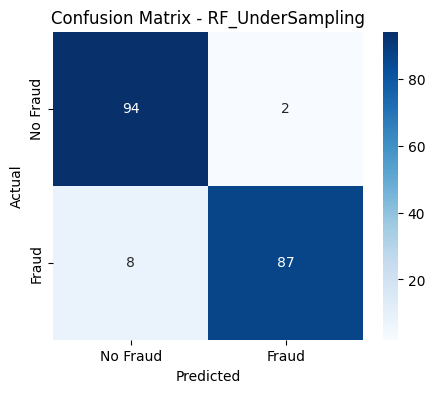

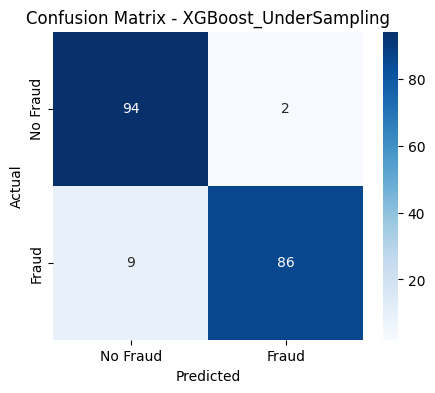

6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step 


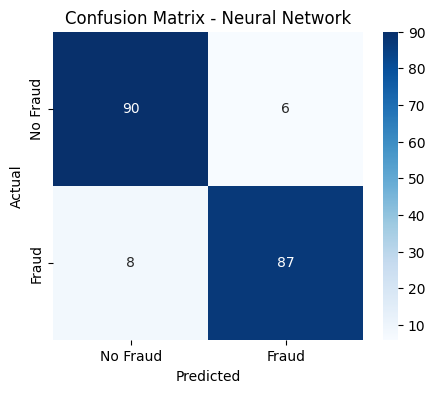


=== Model Test Performans Sonu√ßlarƒ± ===

üìå RF_UnderSampling
Accuracy: 0.9476
Precision: 0.9775
Recall: 0.9158
F1 Score: 0.9457

üìå XGBoost_UnderSampling
Accuracy: 0.9424
Precision: 0.9773
Recall: 0.9053
F1 Score: 0.9399

üìå Neural_Network
Accuracy: 0.9267
Precision: 0.9355
Recall: 0.9158
F1 Score: 0.9255


In [ ]:

from sklearn.metrics import confusion_matrix

# Test seti ile model deƒüerlendirme
results_test = {}
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results_test[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# RandomForest ve XGBoost i√ßin test deƒüerlendirmesi
evaluate_model(models_undersample["RF_UnderSampling"], X_test, y_test, "RF_UnderSampling")
evaluate_model(models_undersample["XGBoost_UnderSampling"], X_test, y_test, "XGBoost_UnderSampling")

# Yapay Sinir Aƒüƒ± i√ßin test deƒüerlendirmesi
y_pred_prob_nn = nn_model_use.predict(X_test)
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)

results_test["Neural_Network"] = {
    "Accuracy": accuracy_nn,
    "Precision": precision_nn,
    "Recall": recall_nn,
    "F1 Score": f1_nn
}

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()

# Sonu√ßlarƒ± Yazdƒ±r
print("\n=== Model Test Performans Sonu√ßlarƒ± ===")
for model, metrics in results_test.items():
    print(f"\nüìå {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

## Daha az overfitting ile stabil bir model olan random forest undersampling daha iyi sonu√ß verdi test performansƒ±nda

## son olarak undersampling edilmi≈ü veriler ile  random forest kullanƒ±lmasƒ±nƒ±n en iyi sonucu verdiƒüini buldum

###*** - ≈ûEYMA ERDOƒûAN***
